# ADF

A number of plots are provided from ADF. The full output from the stand-alone ADF configuration is in the link below.


Note that in standalone format (eg, CUPiD run not through CESM workflow), ADF is currently run by users via the following process:
1) Install ADF and activate cupid-analysis
2) Use the `CUPiD/helper_scripts/generate_adf_config_file.py` script to generate an ADF config file based on a CUPiD configuration file.
   * `cd CUPiD/examples/external_diag_packages`
   * `../../helper_scripts/generate_adf_config_file.py --cupid-config-loc . --adf-template ../../externals/ADF/config_amwg_default_plots.yaml --out-file ADF_config.yaml`
3) Run ADF with the newly created configuration file.
   * `../../externals/ADF/run_adf_diag ADF_config.yaml`

In [1]:
import os

from IPython.core.display import HTML, Image
from IPython.display import display
import pandas as pd

In [2]:
adf_root = "."
case_name = None
base_case_name = None
start_date = ""
end_date = ""
base_start_date = None
base_end_date = None
key_plots = None
compare_obs: False
# adf_root will be external_diag_packages/computed_notebooks/ADF/

In [3]:
# Parameters
case_name = "b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.241"
base_case_name = "b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.234"
case_nickname = "BLT1850_241"
base_case_nickname = "BLT1850_234"
CESM_output_dir = "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CESM_output_for_testing"
start_date = "0001-01-01"
end_date = "0041-01-01"
climo_start_year = 21
climo_end_year = 41
base_start_date = "0001-01-01"
base_end_date = "0081-01-01"
base_climo_start_year = 61
base_climo_end_year = 81
obs_data_dir = (
    "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CUPiD_obs_data"
)
ts_dir = None
lc_kwargs = {"threads_per_worker": 1}
serial = False
adf_root = "../../examples/key_metrics/ADF_output/"
key_plots = [
    "Surface_Wind_Stress_ANN_LatLon_Vector_Mean.png",
    "PRECT_ANN_LatLon_Mean.png",
    "PS_DJF_SHPolar_Mean.png",
    "TaylorDiag_ANN_Special_Mean.png",
]
compare_obs = False
subset_kwargs = {}
product = "/glade/work/tking/cupid_project/other_cupids/234v241/CUPiD/examples/key_metrics/computed_notebooks//atm/ADF.ipynb"


In [4]:
# Want some base case parameter defaults to equal control case values
if base_case_name is not None:
    if base_start_date is None:
        base_start_date = start_date

    if base_end_date is None:
        base_end_date = end_date
if compare_obs:
    base_case_name = "Obs"
    base_start_date = None
    base_end_date = None

In [5]:
# convert start-date and end-date to year range
case_year_range = [int(start_date.split("-")[0]), int(end_date.split("-")[0]) - 1]

if (not base_start_date) and (not base_end_date):
    base_case_year_range = None
else:
    base_case_year_range = [
        int(base_start_date.split("-")[0]),
        int(base_end_date.split("-")[0]) - 1,
    ]

In [6]:
if base_case_year_range:
    base_case_yr_range_str = f"_{base_case_year_range[0]}_{base_case_year_range[1]}"
else:
    base_case_yr_range_str = ""
adf_comparison_name = "b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.241_1_40_vs_b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.234_1_80"
adf_root = os.path.join(adf_root, adf_comparison_name)
display(
    HTML(
        f'<a href="../ADF/{adf_comparison_name}/website/index.html" target="_blank" style="font-size: 30px">Full ADF output</a>'
    )
)

## Key Metrics from ADF

Some important things to look at from ADF include a comparison table and a few maps:

In [7]:
comparison_table = os.path.join(adf_root, "amwg_table_comp.csv")
if os.path.isfile(comparison_table):
    table = pd.read_csv(comparison_table)
    display(HTML(table.to_html(index=False, float_format="{:6g}".format)))

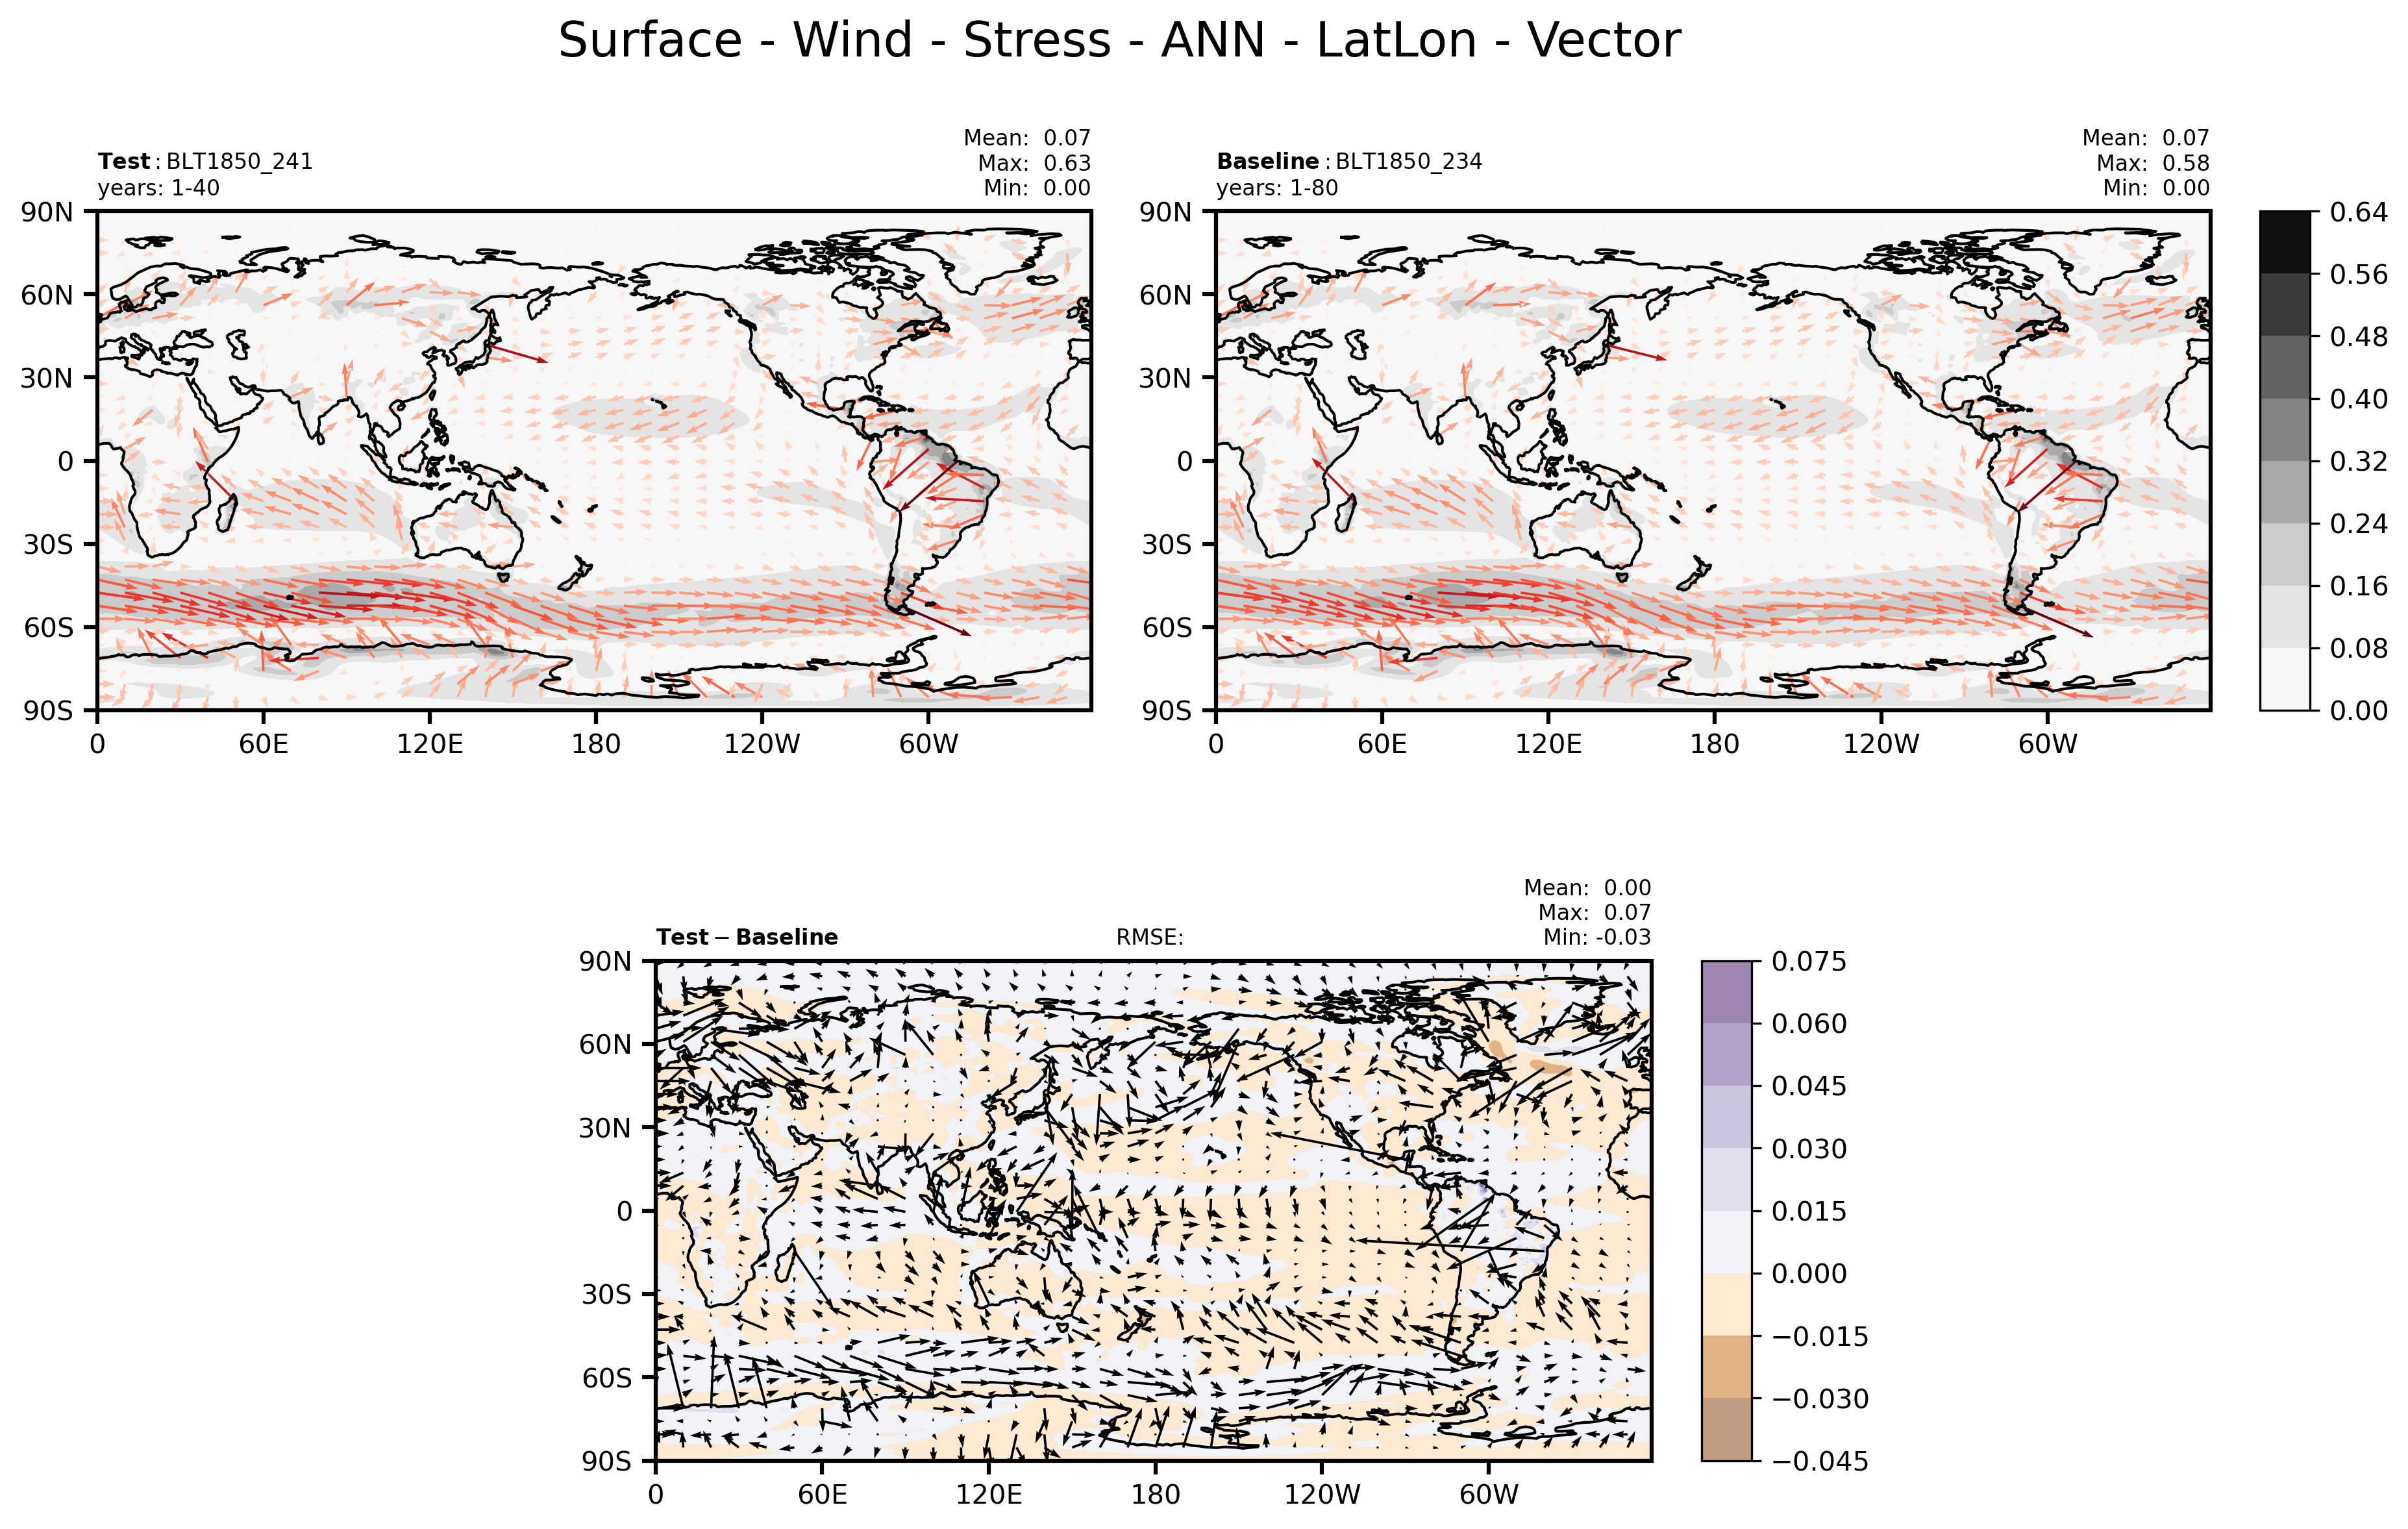

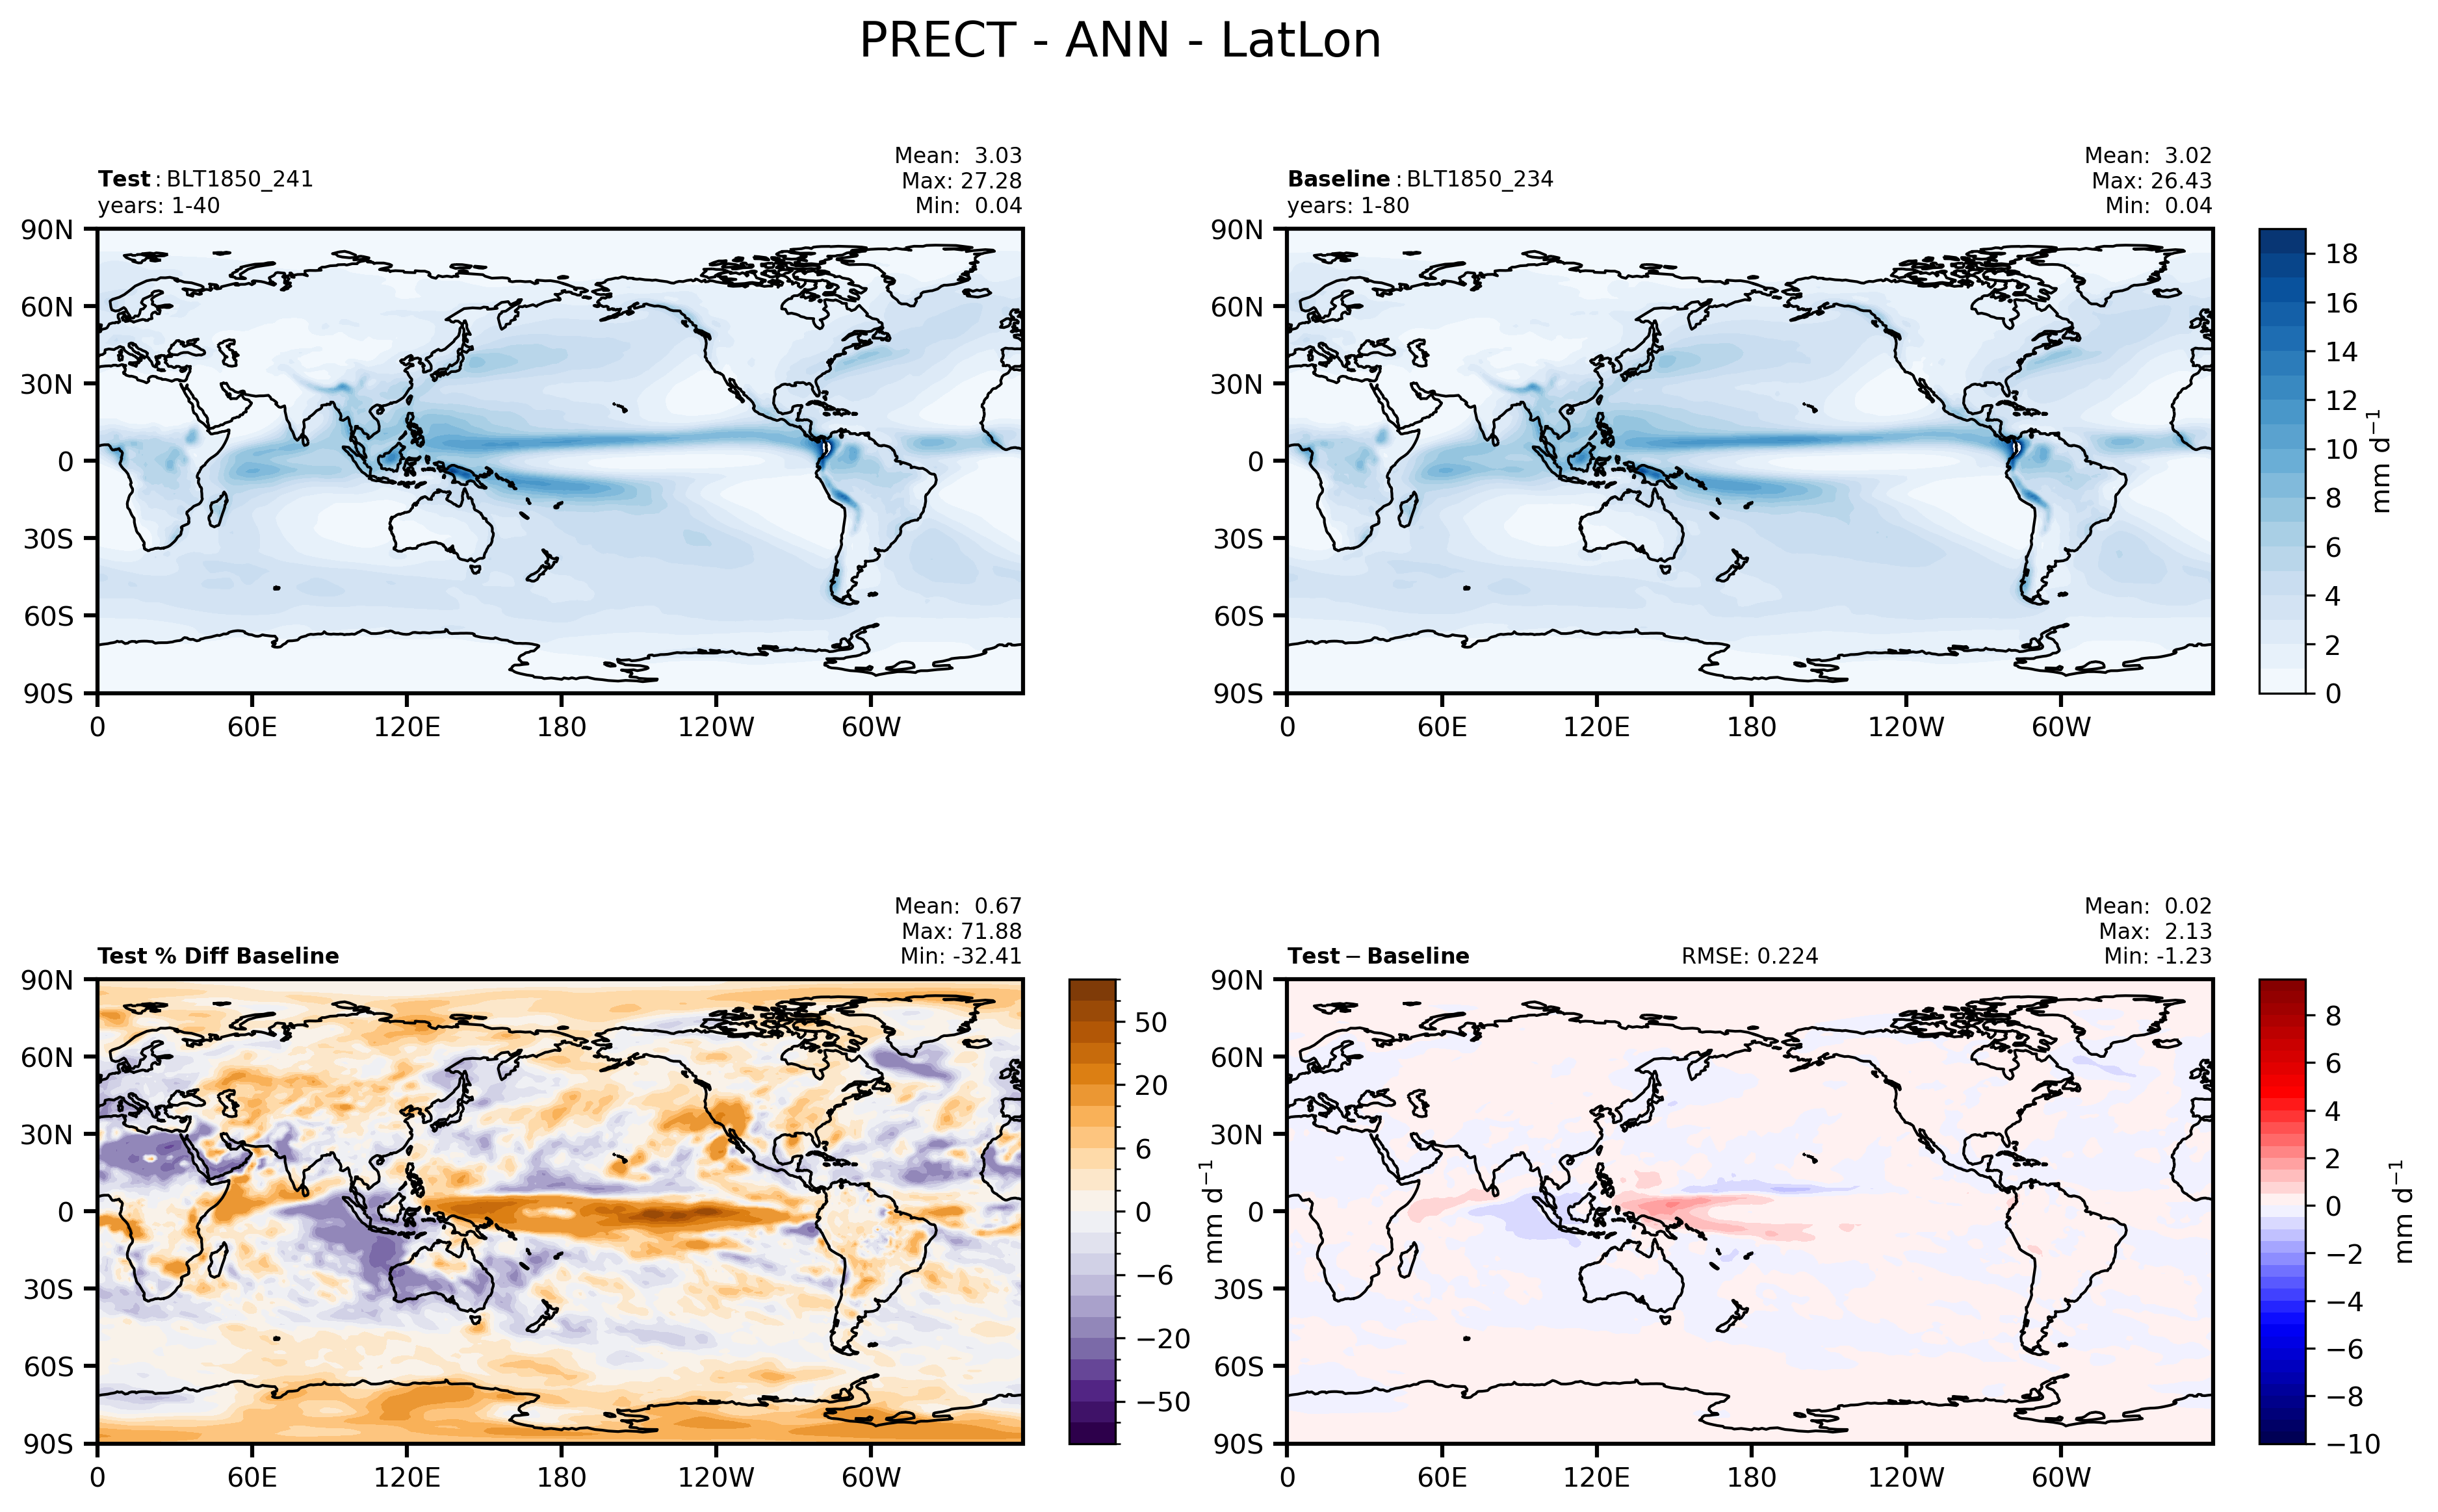

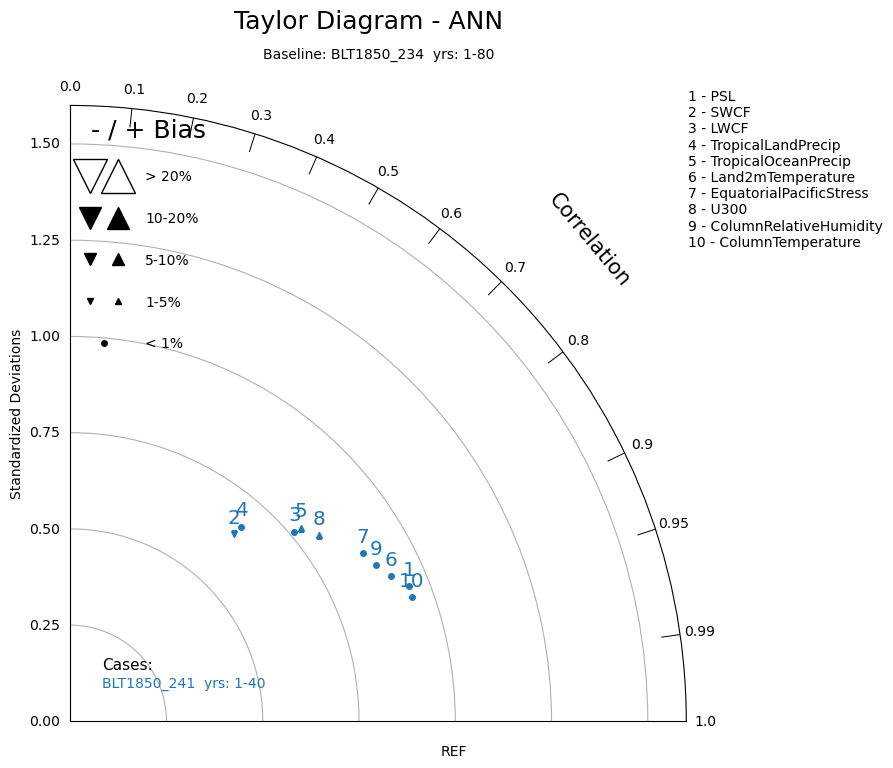

In [8]:
for path_to_key_plot in key_plots:
    full_path = os.path.join(adf_root, path_to_key_plot)
    if os.path.isfile(full_path):
        display(Image(full_path))